# Projet - Thomas Schuler, Nicolas Moine et Julien Reboutier

Nous souhaitons construire un modèle qui nous permettra d'écrire notre code par la main sur une tablette par exemple au lieu de cliquer sur les chiffres afin d'améliorer la sécurité de l'appareil.

Afin de proposer un outil opérationnel, nous allons entrainer un modèle à détecter un chiffre à l'aide d'image déjà enregistré sur internet. Nous allons ensuite développer une interface qui aura vocation à reconnaître les chiffres que l'utilisateur pourra dessiner sur un onglet paint.

## Import des données et des librairies

Nous allons nous munir de la base de données MNIST, issu d'une plus large base de données "NIST" et qui à vocation à entrainer les outils de machine learning à reconnaître les images.

In [ ]:
from PIL import ImageGrab, Image
import numpy as np
from keras.datasets import mnist
import win32gui
import tkinter as tk
from tkinter import *

In [ ]:
(x_train_ini, y_train), (x_test_ini, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train initial shape :', x_train_ini.shape)
print('y_train initial shape :', y_train.shape)

X_train initial shape : (60000, 28, 28)
y_train initial shape : (60000,)


Les images sur ordinateur sont constitués de pixel. Avec des définitions qui varient, il faut uniformiser les images. En l'occurence la base est déjà prête mais les images que nous voudront utiliser devront être uniformiser.

# Présentation des données

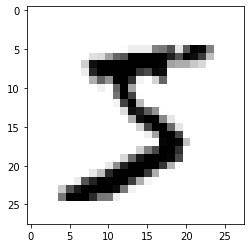

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train_ini[0],cmap='binary')
plt.show()

In [ ]:
def plot_multi(i,write,num):
    '''Plots 64 digits, starting with digit i'''
    nplots = 64
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(8,8,j+1)
        plt.imshow(write[i+j], cmap='binary')
        plt.title(num[i+j])
        plt.axis('off')
    plt.show()

On affiche ici un échantillon des chiffres sur lesquels on s'entraîne.

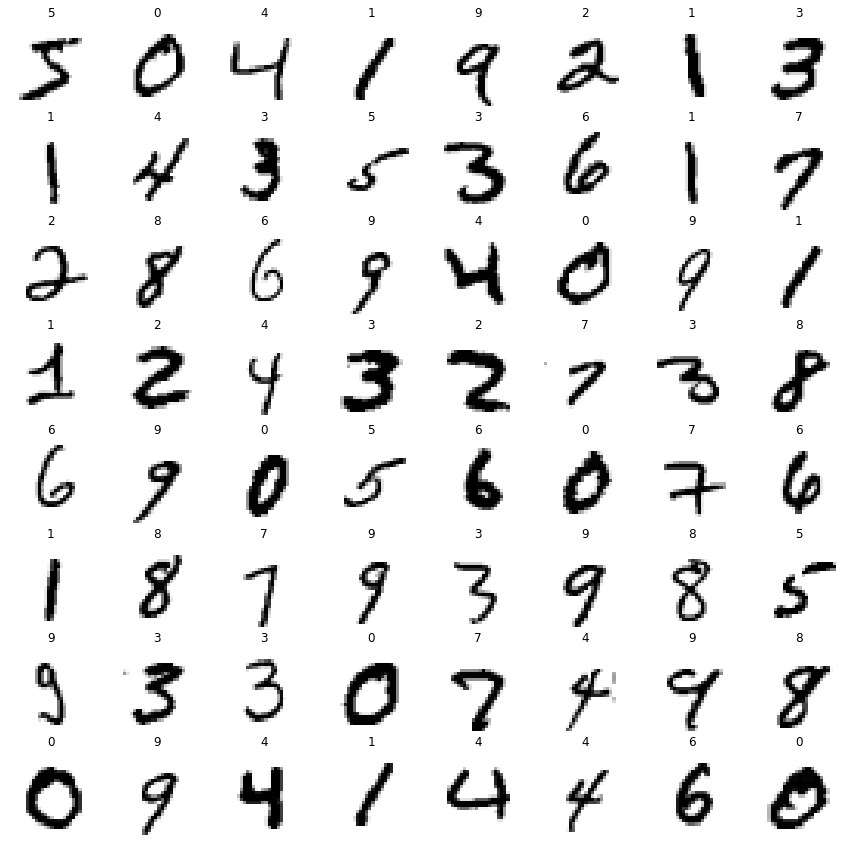

In [ ]:
plot_multi(0,x_train_ini,y_train)

# préparation des données

In [ ]:
x_train = x_train_ini.reshape((len(x_train_ini), -1))
print('X_train shape :', x_train.shape)

x_test = x_test_ini.reshape((len(x_test_ini), -1))

X_train shape : (60000, 784)


### Initialisation et exécution du modèle

1/ La classification : 


Nous faisons face à un problème de classification, nous cherchons à prédire le chiffre écrit dans une image.
Comme tout modèle de classifications nous travaillons sur une base de données et non cherchons à minimiser l’erreur (c’est-à-dire la proportion de fois où nous nous sommes trompés de chiffre à prédire).
Pour chaque image le terme d’erreur s’écrit comme $ E_i=〖(y_i-F(X_i ))〗^2 $
L’erreur globale est donc :$ E=  ∑E_i $
Nous cherchons à minimiser la valeur de E.
La fonction $ F(X_i ) $ est une fonction prenant comme paramètre chaque variable de notre modèle.
Pour un problème de classification, que ce soit par le biais d’une régression logistique ou d’un réseau de neurones l’objectif est de trouver une fonction qui minimise l’erreur. 
Dans le cas d’une régression logistique nous n’avons que 2 couches de neurones (input et ouput), le réseau de neurones est un modèle avec au moins une couche de neurones caché entre l’input et l’output.



2/ Descente de gradient :

La descente de gradient est l'algorithme le plus populaire pour minimiser la fonction de perte (loss function) d'un réseau de neurones.
L’objectif étant de partir d’un point donné est de chercher les valeurs des paramètres qui permettent de réduire la fonction de perte.
Prenons l’exemple pour une fonction à 1 paramètre.
Nous partons du point $ a_0 $ et on calcule le gradient à ce point et on se déplace de l’ancien point avec un ajustement égal au taux d’apprentissage (toujours positif) multiplié par la valeur du gradient. On n’arrête lorsque l’on trouve le minimum de la fonction de perte.
On vérifie bien que si l’on si la valeur initiale $ a_0 $ est supérieure à l’optimum alors la valeur du gradient est positive (et donc l’ajustement se fait à la baisse) et inversement si la valeur initiale est inférieure à l’optimum.


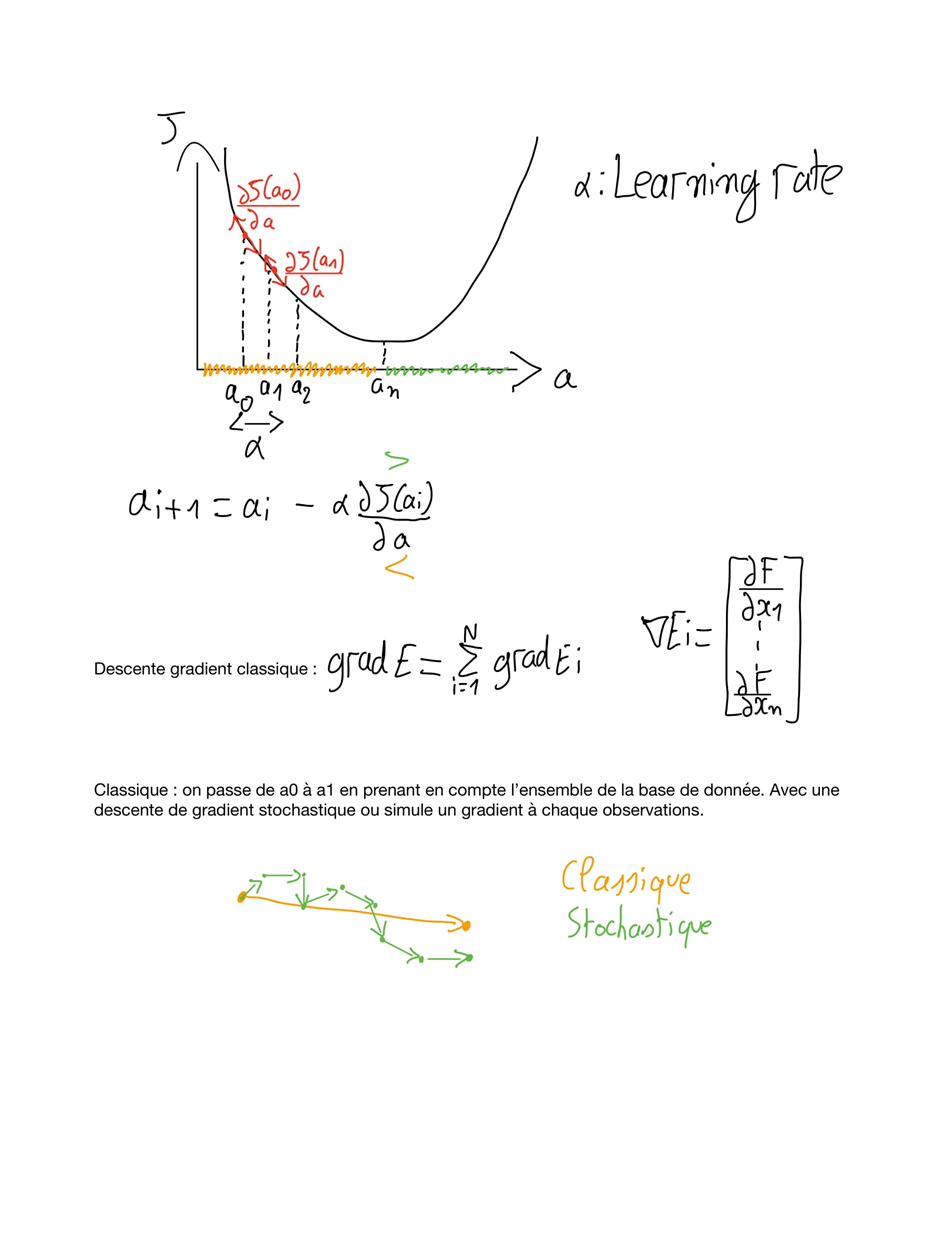

La valeur du Learning rate est l’un des premiers hyperparamètres à prendre en compte lorsque l’on s’intéresse au modèle de réseau de neurones via la descente de gradient.
Un taux trop haut offre une oscillation bien trop importante des $ a_i $ et on pourrait ne jamais atteindre le point optimum (être une fois trop haut puis trop faible puis trop haut, etc.)
Un taux trop faible pourrait occasionner des temps de calcul bien trop important pour la machine.


Dans la plupart des cas, il n’existe pas qu’un seul paramètre mais une multitude.  
La méthode de la descente de gradient stochastique permet de réduire les temps de calcul car on simule chaque gradient par les observations de l’image « i ».  Cette méthode permet surtout d’éviter les problèmes de minimum local. 
En effet, chaque Noeux de notre réseau utilise des fonctions non-linéaires ce qui permet de traduire plus de situation en classification mais qui a pour désavantage d’apporter des cas de minimisation de fonction non convexe (pour lequel le minimal local n’est pas forcément un minimum global)


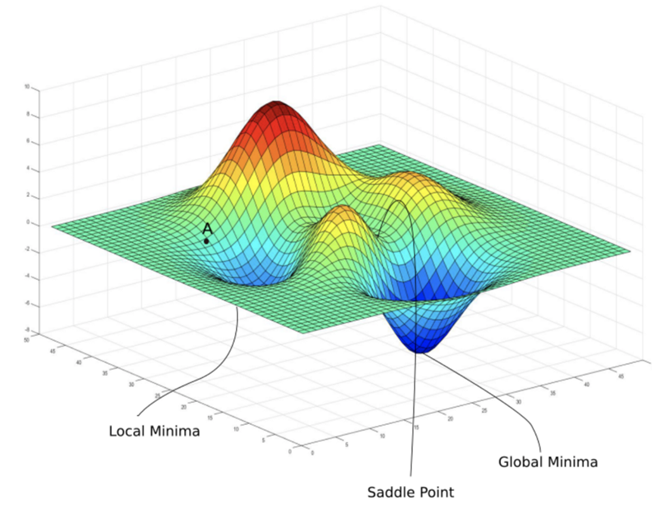

3/MLPClassifier

Activation : forme de la fonction d’activation. Le plus souvent nous utilisons des fonctions non-linéaire qui permettent de s’adapter plus facilement à la variété des données. Les fonctions hyperbolique et sigmoïdes(logistique) sont les plus utilisés en classification.

Solver : Nous utilisons la méthode de la descente du gradient stochastique pour les mêmes raisons qu’expliqués plus haut.

Learning rate unit : Nous avons effectués plusieurs tests et 0.1 semble être un taux efficient.

Tol : Pour éviter des temps de calcul trop important pour trop peu d’améliorations du modèle, lorsqu’une dizaine d’étapes de descente de gradient ne réduisent plus la fonction de perte d’un certain montant (0.001) alors nous arrêtons le processus.


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', alpha=1e-5,
                    solver='sgd', tol=1e-4, random_state=1,learning_rate='adaptive',
                    learning_rate_init=.1, verbose=True )

In [ ]:
mlp.fit(x_train,y_train)

## Verification des résultats et test de la précision

In [ ]:
predictions = mlp.predict(x_test)
predictions[:50] 

array([7, 2, 1, 7, 4, 1, 9, 9, 0, 4, 0, 2, 4, 0, 1, 3, 4, 7, 7, 4, 9, 6,
       6, 5, 9, 0, 7, 4, 0, 1, 3, 1, 3, 6, 9, 2, 7, 1, 3, 1, 1, 7, 9, 2,
       3, 5, 7, 2, 4, 4], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7117

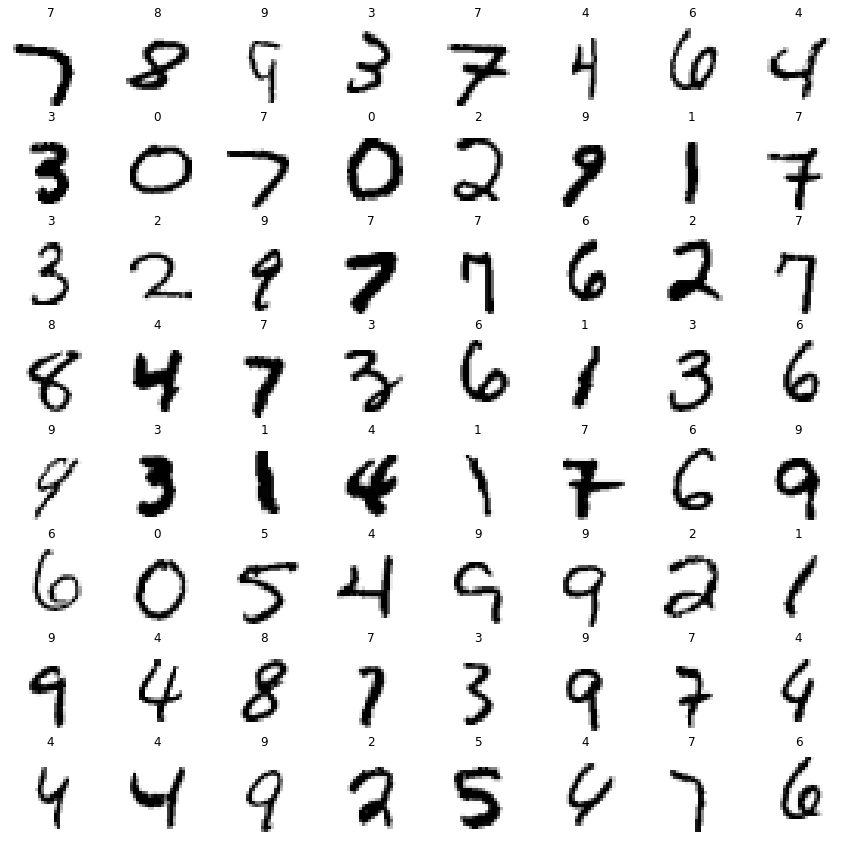

In [ ]:
plot_multi(60,x_test_ini,y_test)

Afin d'écrire le chiffre et de renvoyer une prédiction, il faut décomposer l'action en 3 parties.
- D'abord via l'outil app, on appelle une interface graphique qui nous permet de dessiner le chiffre via la class App et la fonction init qui définit le cadre.
- On définit alors une fonction qui permet de dessiner.
- Puis on définit deux éléments, un premier qui permet de nettoyer le tableau.
- Un deuxième élément permet de prédire le chiffre écrit. Pour ce faire l'élément capture l'image et la reformate via la librairie PIL et ensuite la prédit avec la fonction predict_digit.

In [ ]:
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,-1)

    #predicting the class
    res = mlp.predict(img)

    return res
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit = predict_digit(im)
        self.label.configure(text= str(digit) + ' is detected')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

# Résultat : 

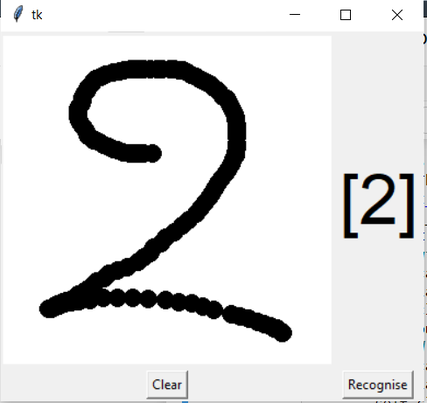

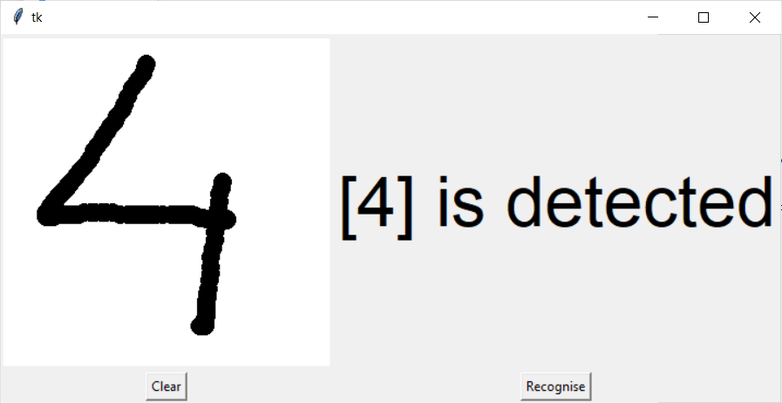

In [ ]:
from IPython.display import display
from PIL import Image

path="/content/image.png"
display(Image.open(path))
path="/content/4.png"
display(Image.open(path))

Limite : Le test que nous faisons tourner dans l'application n'a pas exactement le même format que celui du module initiale car nous avons utilisé une autre libraire pour le programme que celle de la bibliothèque. Ce mélange nous amène parfois à trouver des résultats différents lorsqu'on execute la reconnaissance du chiffre dessiné. Pour autant en faisant grossir la base de donnée et en gardant la rigueur que nous avons eu dans ce travail, nous ne sommes pas inquiet quant à la capacité du modèle à mieux apprendre.